In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  
# import tikzplotlib
my_dict = {'s': (1,'$\\mathrm{s}$'), 'ms': (1e3,'$\\mathrm{ms}$'), 'us':(1e6,'$\\mathrm{\\mu s}$') ,'ns':(1e9,'$\\mathrm{ns}$')}
# print(my_dict)
plt.rcParams.update({'axes.labelsize': 16,'xtick.labelsize': 14, 'ytick.labelsize': 14,'legend.fontsize': 12})

def mydraw2(filename,figsize=(8,6),title='示波器波形读取',label1='CH1',label2='CH2',x_label='时间',y_label='电压/$\\mathrm{V}$',xrange=(),yrange=((),()),time_unit='s',xychage=False,save=''):
    df = pd.read_csv(filename)
    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, 1].to_numpy(dtype=float)
    ch2_data = df.iloc[1:, 2].to_numpy(dtype=float)

    dt=df['Increment'][0]
    delt=df['Start'][0]
    # print('delt',delt)
    x_data=x_data*dt+delt
    x_data*=my_dict[time_unit][0]

    if xychage:
        ch1_data,ch2_data=ch2_data,ch1_data

    # 创建两个子图
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=figsize,sharex=True)
    ylim1,ylim2=yrange
    # 在第一个子图中绘制第一条曲线
    ax1.plot(x_data, ch1_data, label=label1, color='red')
    # ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.grid(True)
    if len(ylim1)!=0:
        ymin,ymax=ylim1
        ax1.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax1.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    if (label1 != None):
        ax1.legend()

    # 在第二个子图中绘制第二条曲线
    ax2.plot(x_data, ch2_data, label=label2, color='blue')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid(True)
    if len(ylim2)!=0:
        ymin,ymax=ylim2
        ax2.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax2.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    if (label2 != None):
        ax2.legend()
    plt.xlabel(f'{x_label}/{my_dict[time_unit][1]}')

    if len(xrange) != 0:
        xmin, xmax = xrange
        plt.xlim(xmin, xmax)
    # 设置标题
    plt.suptitle(title)#,fontsize=10)
    fig.align_ylabels([ax1, ax2])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.08)

    # 调整子图之间的垂直间距
    # plt.tight_layout()
    if save!='':
        plt.savefig(save,bbox_inches='tight')


    # tikzplotlib.save("test.tex")
    # 显示图表
    plt.show()

    return x_data,ch1_data,ch2_data,time_unit

def mydraw(filename,choice=1,figsize=(8,6),title='示波器波形读取', label='CH1',x_label='时间',y_label='电压/$\\mathrm{V}$',xrange=(), yrange=(), time_unit='s', save=''):
    
    # if time_unit == 'us':
    #     time_unit = 'μs'
    
    df = pd.read_csv(filename)

    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, choice].to_numpy(dtype=float)

    dt = df['Increment'][0]
    delt = df['Start'][0]

    x_data = x_data * dt + delt
    x_data *= my_dict[time_unit][0]

    # 创建一个图形
    plt.figure(figsize=figsize)

    # 绘制CH1的数据
    plt.plot(x_data, ch1_data, label=label, color='red')

    plt.xlabel(f'{x_label}/{my_dict[time_unit][1]}')
    plt.ylabel(y_label)
    plt.title(title)
    if len(xrange) != 0:
        xmin, xmax = xrange
        plt.xlim(xmin, xmax)

    if len(yrange) != 0:
        ymin, ymax = yrange
        plt.ylim(ymin, ymax)

    plt.grid(True)
    if (label!=None):
        plt.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.95])


    if save != '':
        plt.savefig(save, bbox_inches='tight')
    plt.show()

    return x_data, ch1_data, time_unit

In [2]:
mydict_t = {'s': 1, 'ms': 1e3, 'μs': 1e6 ,'ns':1e9}
mydict_f = {'Hz': 1, 'kHz': 1e-3, 'MHz': 1e-6 }


def mydrawfft(filename,choice=1, title='前置放大器的输出', x_label='时间', y_label='幅值(V)', yrange=(),frange=(), time_unit='s',fre_unit='Hz', save=''):
    
    if time_unit == 'us':
        time_unit = 'μs'
    
    df = pd.read_csv(filename)

    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, choice].to_numpy(dtype=float)

    dt = df['Increment'][0]
    delt = df['Start'][0]

    x_data = x_data * dt + delt
    x_data *= mydict_t[time_unit]

    n=len(x_data)
    # 计算FFT
    fft_result = np.fft.fft(ch1_data)
    fft_freqs = np.arange(n)/(n*dt) # FFT频率轴
    fft_freqs *= mydict_f[fre_unit]
    plt.figure(figsize=(12, 6))

    fig, axs = plt.subplots(2, 1, figsize=(12, 6))

    # 上面的子图：波形图
    axs[0].plot(x_data, ch1_data, color='red')
    axs[0].set_xlabel(f'{x_label}/{time_unit}')
    axs[0].set_ylabel(y_label)
    axs[0].set_title(title)
    if len(yrange) != 0:
        ymin, ymax = yrange
        axs[0].set_ylim(ymin, ymax)
    axs[0].grid(True)
    # axs[0].legend()

    axs[1].plot(fft_freqs[1:], np.abs(fft_result)[1:],color='purple')
    axs[1].set_title('FFT变换后')
    axs[1].set_xlabel(f'频率({fre_unit})')
    axs[1].set_ylabel('幅值(V)')
    if len(frange) != 0:
        fmin, fmax = frange
        axs[1].set_xlim(fmin, fmax)
    axs[1].grid(True)

    # 调整子图之间的垂直间距
    fig.align_ylabels([axs[0], axs[1]])
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    if save != '':
        plt.savefig(save, bbox_inches='tight')

    plt.show()


In [3]:
import os

def get_csv_files_sorted_by_mtime(directory):
    files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(".csv") and os.path.isfile(os.path.join(directory, file))]
    sorted_files = sorted(files, key=lambda x: os.path.getmtime(x))
    return sorted_files

# 用法示例：
directory_path = "data"
sorted_csv_files = get_csv_files_sorted_by_mtime(directory_path)

for file in sorted_csv_files:
    print(file)

data\200_us_zc.csv
data\200_us_qbc.csv
data\200us_gbc.csv
data\1000us.csv
data\10us.csv
data\1us.csv
data\yj1.csv
data\yj2.csv
data\yj3.csv
data\yj4.csv
data\yj5.csv
data\yj6.csv
data\zy0.csv
data\zy0_5.csv
data\zy1.csv
data\zy2.csv
data\zy3.csv
data\zy4.csv
data\zy5.csv
data\zy6.csv


# 极零相消

文件是data\200_us_zc.csv


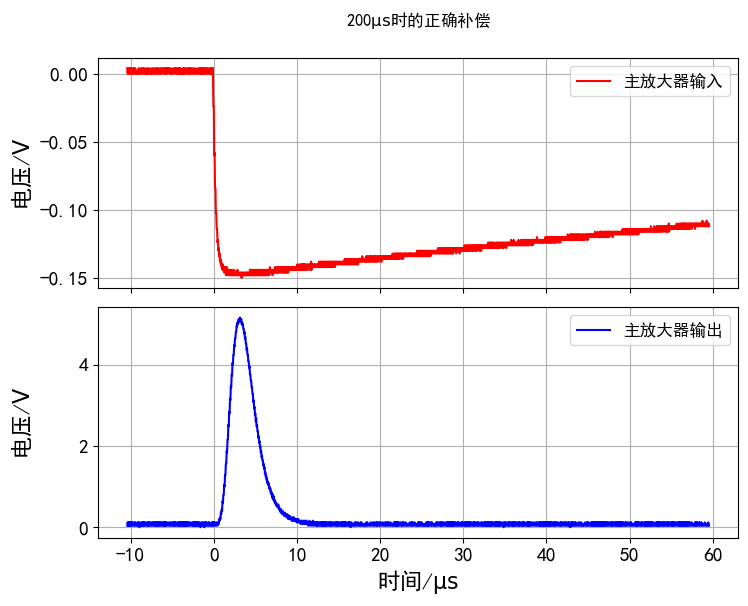

文件是data\200_us_zc.csv


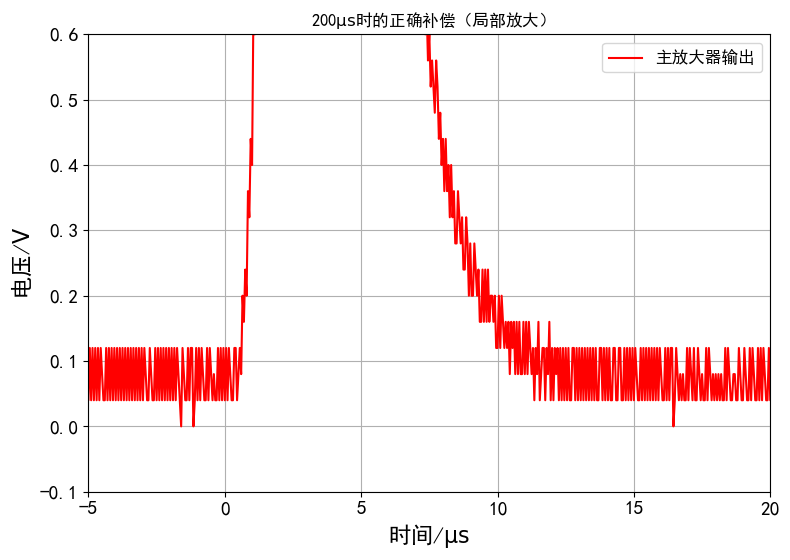

文件是data\200_us_qbc.csv


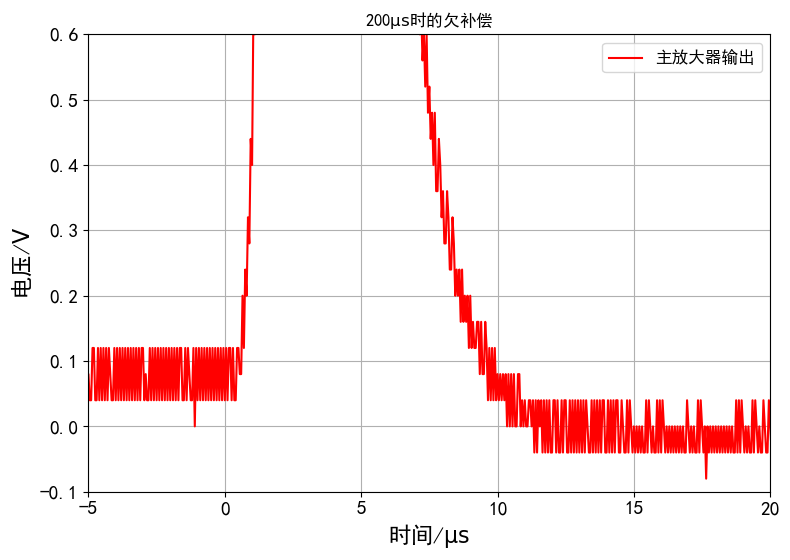

文件是data\200us_gbc.csv


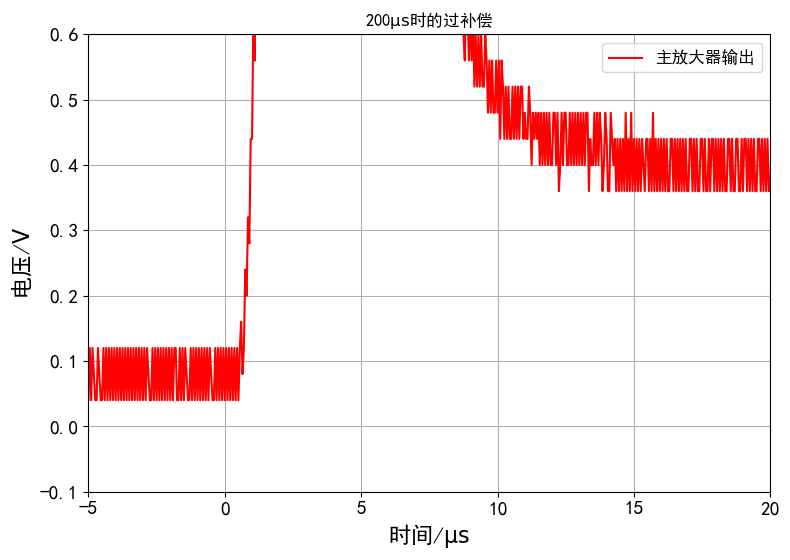

In [4]:
file=sorted_csv_files[0]
print(f"文件是{file}")
mydraw2(file,time_unit="us",label1='主放大器输入',label2="主放大器输出",title="200$\\mathrm{\\mu s}$时的正确补偿",xychage=True,save="pic/200us_Proper_Compensation.pdf")

title=["200$\\mathrm{\\mu s}$时的正确补偿（局部放大）","200$\\mathrm{\\mu s}$时的欠补偿","200$\\mathrm{\\mu s}$时的过补偿"]
save=["pic/200us_Proper_Compensation_local.pdf","pic/200us_Under_Compensation.pdf","pic/200us_Over_Compensation.pdf"]
for i in range(3):
    file=sorted_csv_files[i]
    print(f"文件是{file}")
    mydraw(file,time_unit="us",label="主放大器输出",title=title[i],xrange=(-5,20),yrange=(-0.1,0.6),save=save[i])

文件是data\1000us.csv


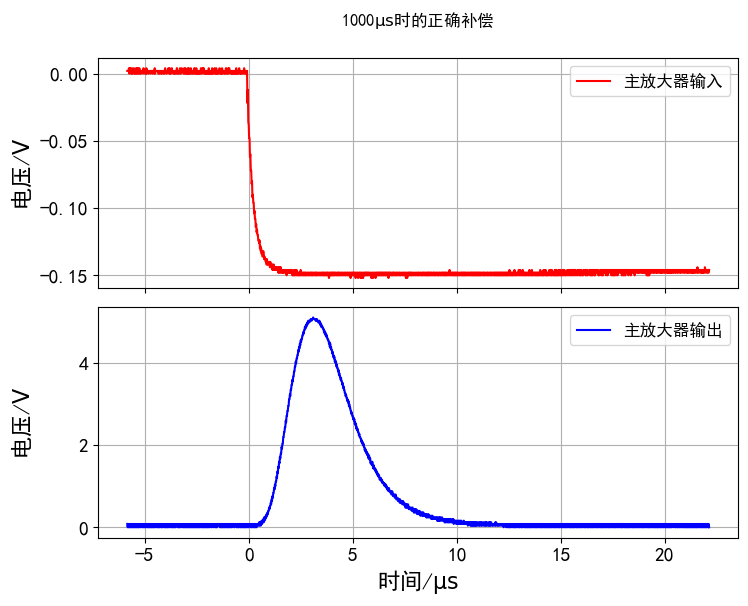

文件是data\10us.csv


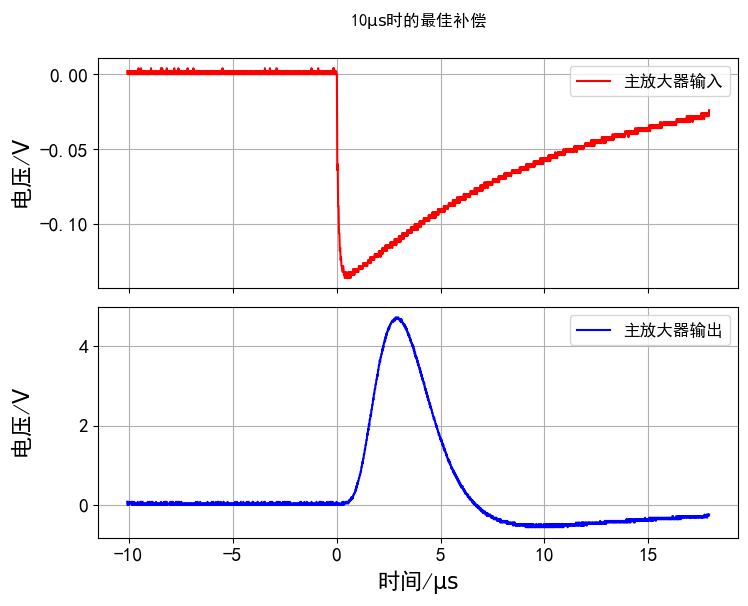

文件是data\1us.csv


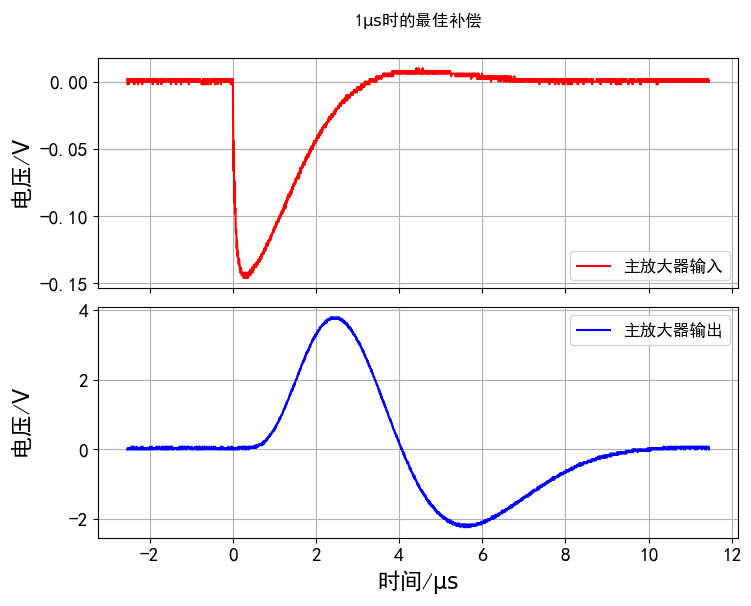

In [5]:
title=["1000$\\mathrm{\\mu s}$时的正确补偿","10$\\mathrm{\\mu s}$时的最佳补偿","1$\\mathrm{\\mu s}$时的最佳补偿"]
save=["pic/1000us_optimal_compensation.pdf","pic/10us_optimal_compensation.pdf","pic/1us_optimal_compensation.pdf"]
for i in range(3):
    file=sorted_csv_files[i+3]
    print(f"文件是{file}")
    mydraw2(file,time_unit="us",label1="主放大器输入",label2="主放大器输出",title=title[i],save=save[i],xychage=True)

# 6个节点

In [6]:
sorted_csv_files[6]
df = pd.read_csv(sorted_csv_files[6])
time_unit="us"
# 提取X轴和Y轴数据
x_data = df.iloc[1:, 0].to_numpy(dtype=float)
dt=df['Increment'][0]
delt=df['Start'][0]
x_data=x_data*dt+delt
x_data*=my_dict[time_unit][0]
output_data = df.iloc[1:, 1].to_numpy(dtype=float)
# node1_data = df.iloc[1:, 2].to_numpy(dtype=float)

node_data=[]
for i in range(6,12):
    # print(sorted_csv_files[i])
    df = pd.read_csv(sorted_csv_files[i])
    node_data.append(df.iloc[1:, 2].to_numpy(dtype=float))


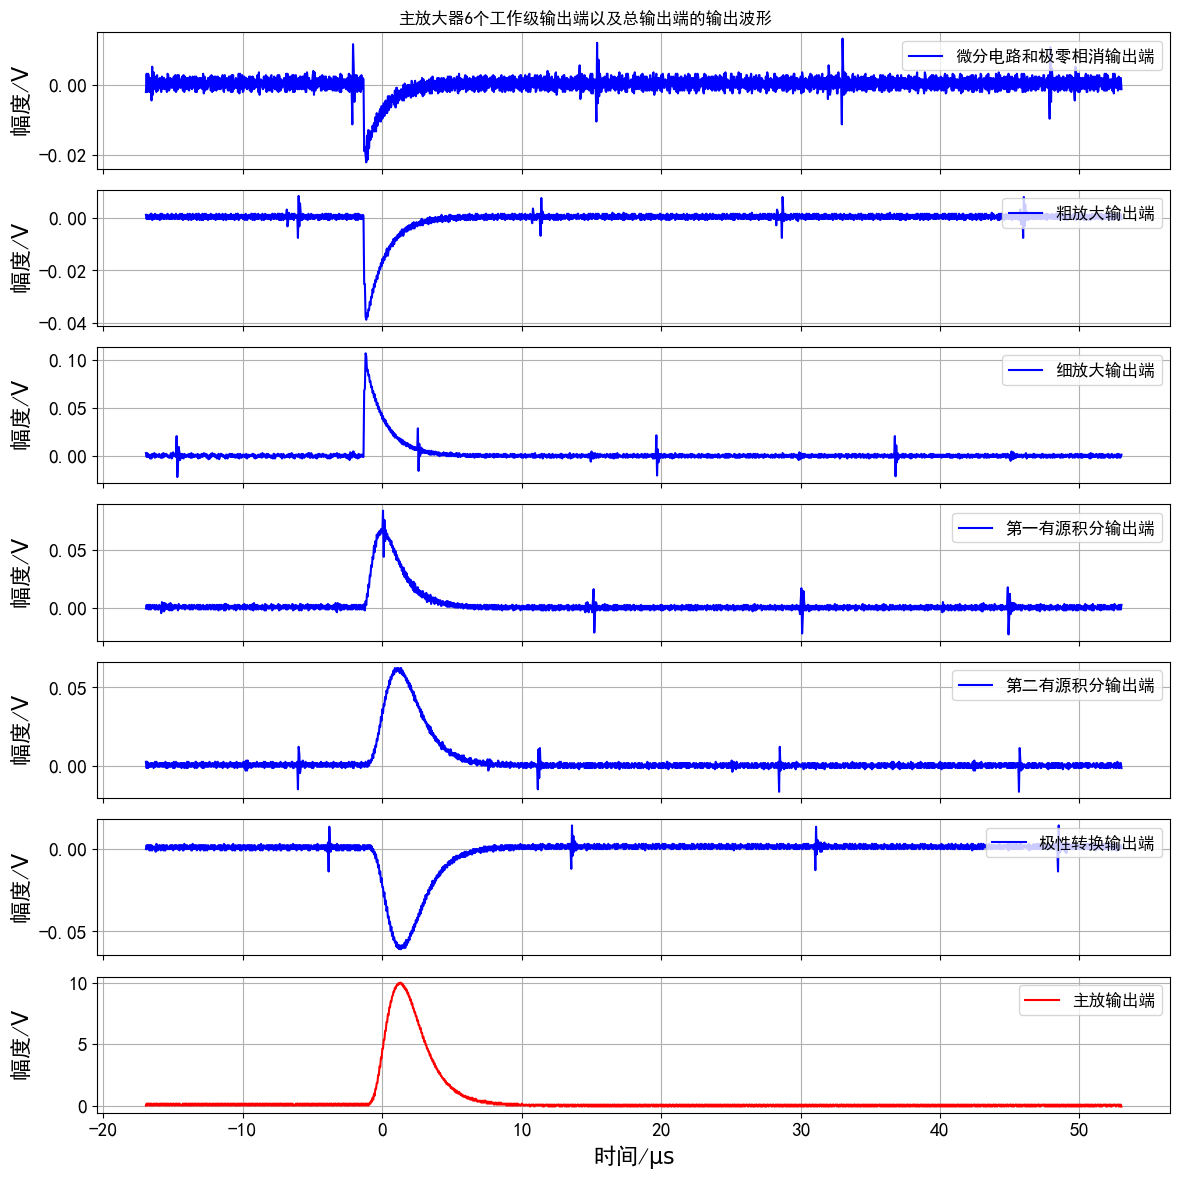

In [7]:
# 创建数据

ylabel=["微分电路和极零相消输出端","粗放大输出端","细放大输出端","第一有源积分输出端","第二有源积分输出端","极性转换输出端","主放输出端"]

# 创建七个子图
fig, axs = plt.subplots(7, 1, sharex=True, figsize=(12, 12))

# 绘制每个子图

for i in range(6):
    axs[i].plot(x_data,node_data[i],color="blue",label=ylabel[i])
axs[6].plot(x_data, output_data,color="red",label=ylabel[6])
# axs[1].plot(x, y2)
# axs[2].plot(x, y3)
# axs[3].plot(x, y4)
# axs[4].plot(x, y5)
# axs[5].plot(x, y6)
# axs[6].plot(x, y7)

# 添加标签、标题等
for ax in axs:
    ax.legend(loc='upper right')
    ax.set_ylabel(f"幅度/$\\mathrm{{V}}$")
    ax.grid(True)

# 最后一个子图添加x轴标签
# axs[-1].set_xlabel(f"时间")
plt.xlabel(f'时间/{my_dict[time_unit][1]}')
# plt.xlim(-5, 15)
# 调整布局
plt.suptitle("主放大器6个工作级输出端以及总输出端的输出波形")
plt.tight_layout()
fig.align_ylabels(axs)
# plt.savefig("pic\\6node.pdf",bbox_inches='tight')
# 显示图形
plt.show()

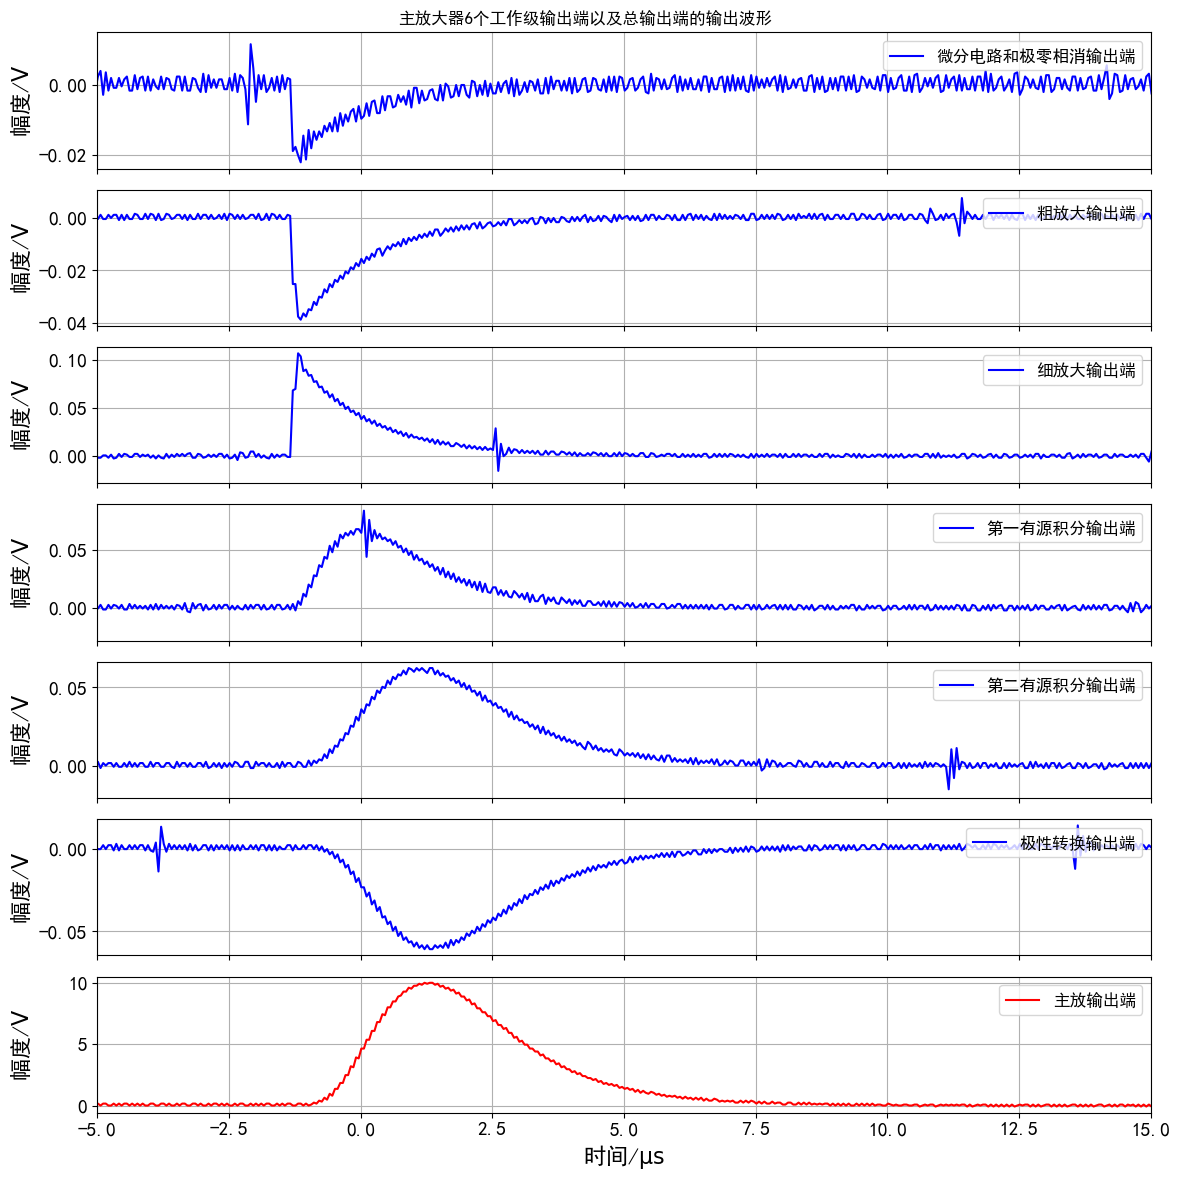

In [8]:
# 创建数据

ylabel=["微分电路和极零相消输出端","粗放大输出端","细放大输出端","第一有源积分输出端","第二有源积分输出端","极性转换输出端","主放输出端"]

# 创建七个子图
fig, axs = plt.subplots(7, 1, sharex=True, figsize=(12, 12))

# 绘制每个子图

for i in range(6):
    axs[i].plot(x_data,node_data[i],color="blue",label=ylabel[i])
axs[6].plot(x_data, output_data,color="red",label=ylabel[6])
# axs[1].plot(x, y2)
# axs[2].plot(x, y3)
# axs[3].plot(x, y4)
# axs[4].plot(x, y5)
# axs[5].plot(x, y6)
# axs[6].plot(x, y7)

# 添加标签、标题等
for ax in axs:
    ax.legend(loc='upper right')
    ax.set_ylabel(f"幅度/$\\mathrm{{V}}$")
    ax.grid(True)

# 最后一个子图添加x轴标签
# axs[-1].set_xlabel(f"时间")
plt.xlabel(f'时间/{my_dict[time_unit][1]}')
plt.xlim(-5, 15)
# 调整布局
plt.suptitle("主放大器6个工作级输出端以及总输出端的输出波形")
plt.tight_layout()
fig.align_ylabels(axs)
plt.savefig("pic\\6node.pdf",bbox_inches='tight')
# 显示图形
plt.show()

In [9]:
def mydraw2_here(filename,figsize=(8,6),
                 title='示波器波形读取',label1='CH1',label2='CH2',
                 x_label='时间',y_label='电压/$\\mathrm{V}$',xrange=(),yrange=((),()),
                 time_unit='s',xychage=False,fengkuan=False,
                 save=''):
    df = pd.read_csv(filename)
    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, 1].to_numpy(dtype=float)
    ch2_data = df.iloc[1:, 2].to_numpy(dtype=float)

    dt=df['Increment'][0]
    delt=df['Start'][0]
    # print('delt',delt)
    x_data=x_data*dt+delt
    x_data*=my_dict[time_unit][0]
    if xychage:
        ch1_data,ch2_data=ch2_data,ch1_data

    maxindex1=np.argmax(-ch1_data)
    maxvalue1=ch1_data[maxindex1]
    maxindex2=np.argmax(ch2_data)
    maxvalue2=ch2_data[maxindex2]
    inputrc=np.where(ch1_data > maxvalue1/3)[0][-1]
    x_data-=x_data[inputrc]

    left_index = -1
    right_index = -1

    print(f"输入端最大值为{maxvalue1*1000}(mV)")
    # print(f"输入端上升沿时间为{x_data[inputrc]}")
    print(f"输出端最大值为{maxvalue2}")
    print(f"放大倍数为{maxvalue2/maxvalue1}")
    print(f"输出端最大值对应的时间{x_data[maxindex2]}")

    half_peak_value=maxvalue2/2
    if fengkuan:
        left_index = np.where(ch2_data[:maxindex2] <= half_peak_value)[0][-1]
        right_index = np.where(ch2_data[maxindex2:] <= half_peak_value)[0][0] +maxindex2

    if left_index!=-1:
        print(f"输出端左半峰值为{x_data[left_index]}")
    if right_index!=-1:
        print(f"输出端右半峰值为{x_data[right_index]}")
    if left_index!=-1 and left_index!=-1:
        print(f'峰宽为{x_data[right_index]-x_data[left_index]}')

    # 创建两个子图
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=figsize,sharex=True)
    ylim1,ylim2=yrange
    # 在第一个子图中绘制第一条曲线
    ax1.plot(x_data, ch1_data, label=label1, color='red')
    # ax1.annotate(f"最大值：{maxvalue1}", (x_data[maxindex1], maxvalue1))
    # ax1.annotate(f"最大值：({x_data[maxindex1]:.4f}$\\mathrm{{\\mu s}}$,{maxvalue1:.4f}$\\mathrm{{V}}$)", xy=(x_data[maxindex1], maxvalue1), xytext=(x_data[maxindex1]+1, maxvalue1+0.01),
    #         arrowprops=dict(color='purple', shrink=0.05), fontsize=20
    #         )
    ax1.scatter(x_data[maxindex1], maxvalue1, marker="x", color="purple",label="最大值",s=100)
    # ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.grid(True)
    if len(ylim1)!=0:
        ymin,ymax=ylim1
        ax1.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax1.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    if (label1 != None):
        ax1.legend()

    # 在第二个子图中绘制第二条曲线

    ax2.plot(x_data, ch2_data, label=label2, color='blue')
    # ax2.annotate(f"最大值：{maxvalue2}", (x_data[maxindex2], maxvalue2))
    # ax2.annotate(f"最大值：({x_data[maxindex2]:.4f}$\\mathrm{{\\mu s}}$,{maxvalue2:.2f}$\\mathrm{{V}}$)", 
    #              xy=(x_data[maxindex2], maxvalue2), fontsize=20)
    # ax2.axhline(y=half_peak_value, color='orange', linestyle='--', label='Half Peak Value')

    ax2.scatter(x_data[maxindex2], maxvalue2, marker="x", color="purple",label="最大值",s=100)
    if left_index!=-1:
        ax2.scatter(x_data[left_index], half_peak_value, marker="v", color="purple",label="左半峰点",s=100)
    if right_index!=-1:
        ax2.scatter(x_data[right_index], half_peak_value, marker="^", color="purple",label="右半峰点",s=100)
    if left_index!=-1 and right_index!=-1:
        ax2.plot([x_data[left_index], x_data[right_index]], [half_peak_value, half_peak_value],linestyle='--', color='purple')

    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid(True)


    if len(ylim2)!=0:
        ymin,ymax=ylim2
        ax2.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax2.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    if (label2 != None):
        ax2.legend()
    plt.xlabel(f'{x_label}/{my_dict[time_unit][1]}')

    if len(xrange) != 0:
        xmin, xmax = xrange
        plt.xlim(xmin, xmax)
    # 设置标题
    plt.suptitle(title)#,fontsize=10)
    fig.align_ylabels([ax1, ax2])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.08)

    # 调整子图之间的垂直间距
    # plt.tight_layout()
    if save!='':
        plt.savefig(save,bbox_inches='tight')


    # tikzplotlib.save("test.tex")
    # 显示图表
    plt.show()

    return x_data,ch1_data,ch2_data,time_unit

data\zy0.csv
输入端最大值为-32.0(mV)
输出端最大值为10.4
放大倍数为-325.0
输出端最大值对应的时间3.8499999999999988


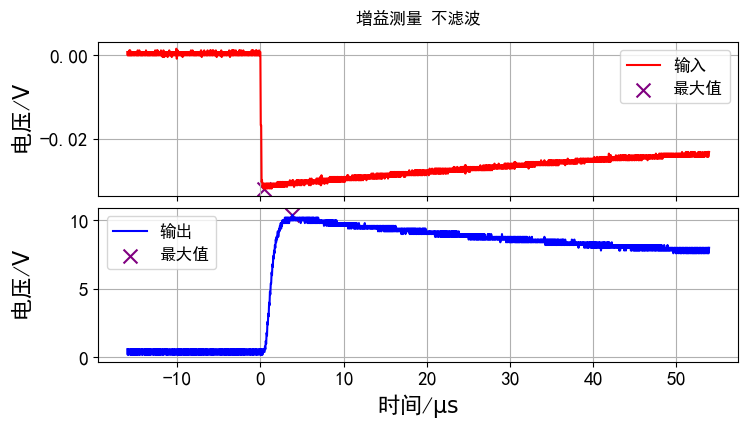

data\zy0_5.csv
输入端最大值为-32.4(mV)
输出端最大值为9.2
放大倍数为-283.95061728395063
输出端最大值对应的时间2.049999999999999
输出端左半峰值为1.1999999999999986
输出端右半峰值为3.3499999999999996
峰宽为2.1500000000000012


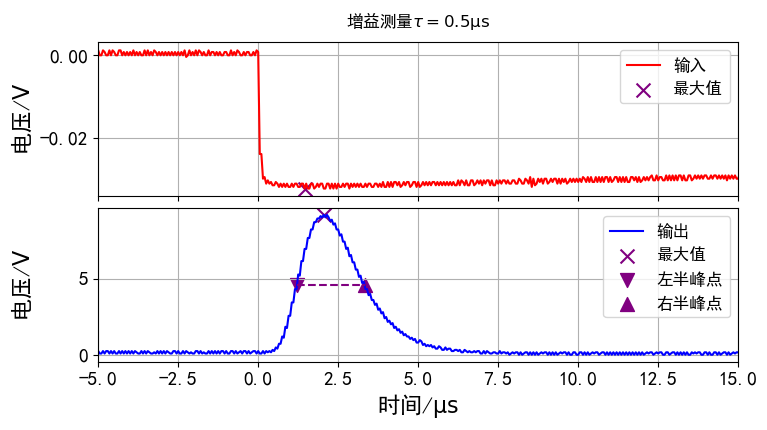

data\zy1.csv
输入端最大值为-32.0(mV)
输出端最大值为10.88
放大倍数为-340.0
输出端最大值对应的时间3.1400000000000006
输出端左半峰值为1.8800000000000006
输出端右半峰值为5.18
峰宽为3.299999999999999


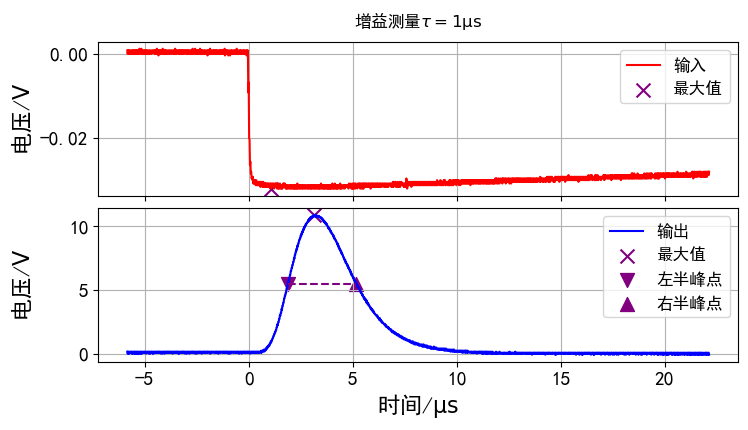

data\zy2.csv
输入端最大值为-22.8(mV)
输出端最大值为9.84
放大倍数为-431.57894736842104
输出端最大值对应的时间5.620000000000001
输出端左半峰值为3.2399999999999993
输出端右半峰值为9.5
峰宽为6.260000000000001


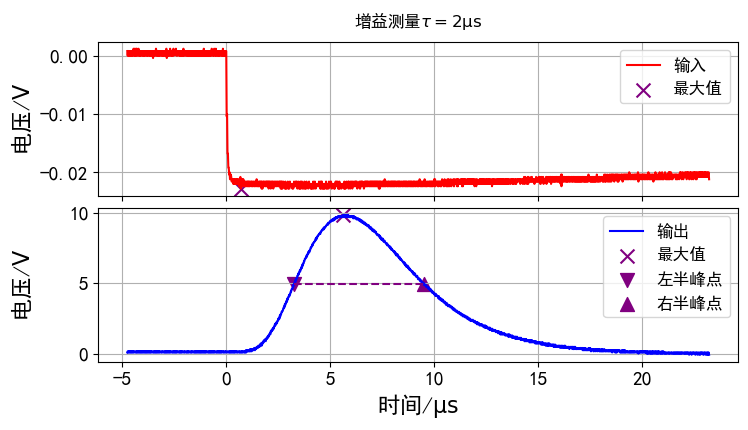

data\zy3.csv
输入端最大值为-22.8(mV)
输出端最大值为9.679999
放大倍数为-424.56135964912283
输出端最大值对应的时间7.6499999999999995
输出端左半峰值为4.500000000000001
输出端右半峰值为13.45
峰宽为8.95


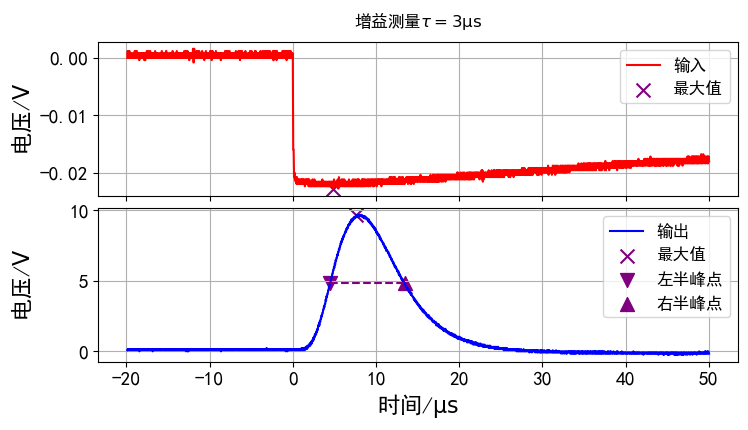

data\zy4.csv
输入端最大值为-22.4(mV)
输出端最大值为8.88
放大倍数为-396.42857142857144
输出端最大值对应的时间9.849999999999998
输出端左半峰值为5.499999999999998
输出端右半峰值为16.549999999999997
峰宽为11.049999999999999


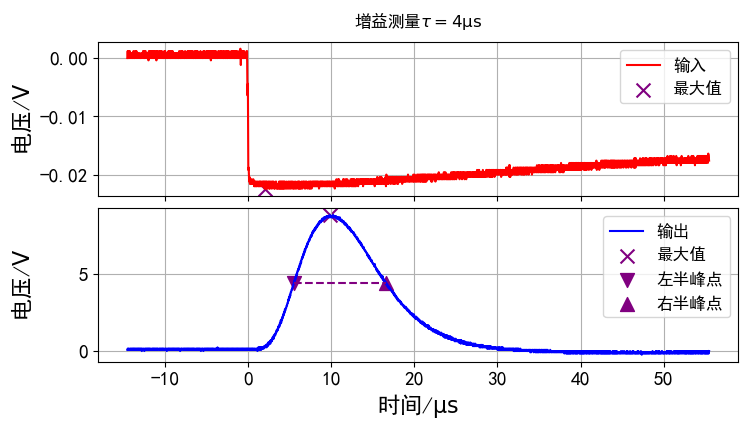

data\zy5.csv
输入端最大值为-22.4(mV)
输出端最大值为8.72
放大倍数为-389.28571428571433
输出端最大值对应的时间11.85
输出端左半峰值为6.7
输出端右半峰值为20.049999999999997
峰宽为13.349999999999998


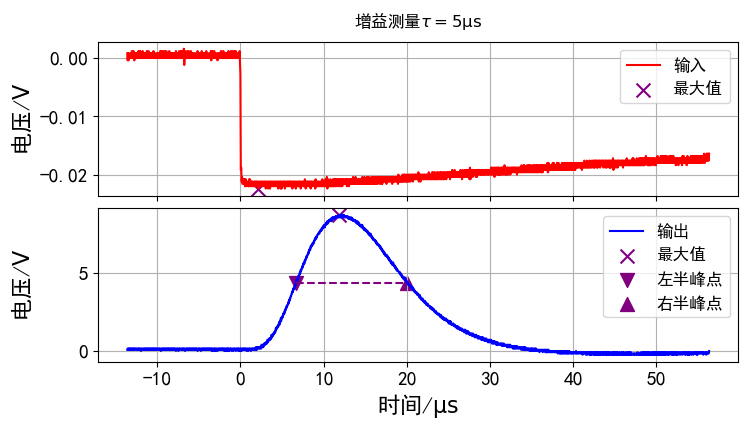

data\zy6.csv
输入端最大值为-22.4(mV)
输出端最大值为8.639999
放大倍数为-385.71424107142855
输出端最大值对应的时间13.999998600000001
输出端左半峰值为7.999999199999998
输出端右半峰值为24.099997589999997
峰宽为16.09999839


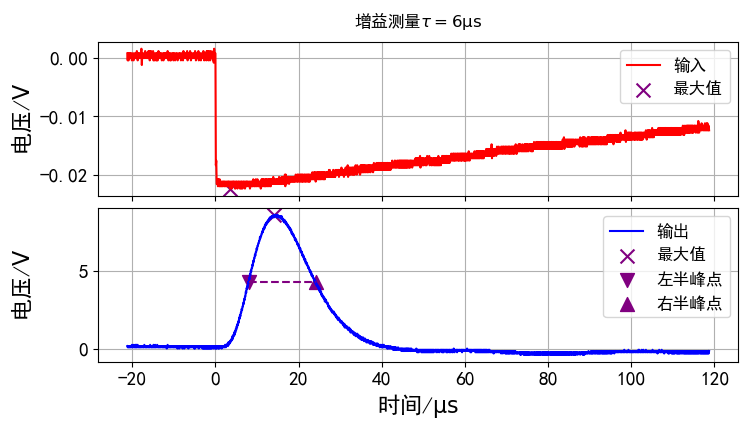

In [10]:
# for i in range(12,20):
#     # print("dfsdjkdsg")
#     print(sorted_csv_files[i])
title=[f"增益测量$\\tau={i}\\mathrm{{\\mu s}}$" for i in [0.5,1,2,3,4,5,6]]
save=[f"pic\\Aplifier_tau_{i}.pdf" for i in ['No',0.5,1,2,3,4,5,6]]

# squares = [x ** 2 for x in range(1, 11)]
title.insert(0,f"增益测量 不滤波")
# print(title)
for i in range(8):
    if i==1:
        xrange=(-5,15)
    else:
        xrange=()

    if i==0:
        banfeng=False
    else:
        banfeng=True
    print(sorted_csv_files[i+12])
    mydraw2_here(sorted_csv_files[i+12],figsize=(8,4),label1="输入",label2="输出",time_unit="us",xrange=xrange,title=title[i],fengkuan=banfeng,xychage=True,save=save[i])

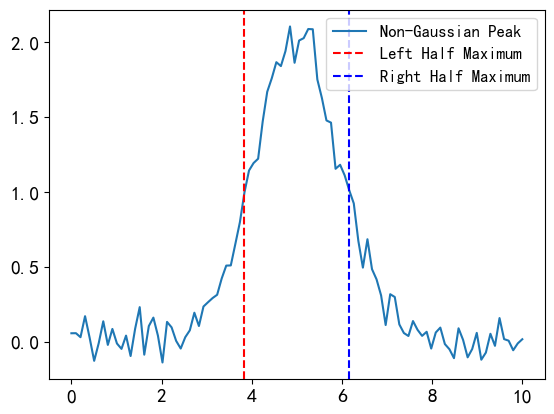

非高斯峰的半高全宽度 (FWHM): 2.3232


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据（非高斯峰）
x = np.linspace(0, 10, 100)
y = 2 * np.exp(-(x - 5)**2 / 2) + np.random.normal(0, 0.1, size=len(x))

# 找到峰的位置
peak_index = np.argmax(y)
peak_value = y[peak_index]

# 确定峰的高度（一半的峰值）
half_peak_value = peak_value / 2

# 计算左侧半高点
left_index = np.where(y[:peak_index] <= half_peak_value)[0][-1]

# 计算右侧半高点
right_index = np.where(y[peak_index:] <= half_peak_value)[0][0] + peak_index

# 计算半高全宽度
fwhm = x[right_index] - x[left_index]

# 可视化结果
plt.plot(x, y, label='Non-Gaussian Peak')
plt.axvline(x[left_index], color='red', linestyle='--', label='Left Half Maximum')
plt.axvline(x[right_index], color='blue', linestyle='--', label='Right Half Maximum')
plt.legend()
plt.show()

print(f"非高斯峰的半高全宽度 (FWHM): {fwhm:.4f}")
